In [1]:
import pandas as pd
import numpy as np
import copy
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [177]:
filepath = '/home/user/Desktop/env2/VAR/macro/macro_analysis_sonia.xlsx'
df = pd.read_excel(filepath)
##########for the plot only
# df1=df[["Date","Libor 1M","BGCR Repo rates"]]
# df1.dropna(inplace=True)
# df1.index=df1['Date']
# df1=df1.drop(['Date'],axis=1)
##########upto this
####### For further analysis
df=df[["Date","SONIA 1M","Inflation","Short term interest rates","Long term interest rates","GDP"]]
# df=df[["Date","Libor 1M","BGCR Repo rates"]]
# df.dropna(inplace=True)
df.index=df['Date']
df=df.drop(['Date'],axis=1)
df.tail()

,SONIA 1M,Inflation,Short term interest rates,Long term interest rates,GDP
Date,,,,,
01.12.2020,0.048695,0.6,0.03,0.3224,548001.0
01.01.2021,0.049370,0.7,0.03,0.3672,550120.0
01.02.2021,0.048695,0.4,0.05,0.6222,552239.0
01.03.2021,0.048613,0.7,0.08,0.8456,554358.0
01.04.2021,0.048075,0.7,0.09,0.8500,556477.0


Text(0.5, 1.0, 'PLOT OF SONIA 1M AGAINST GDP')

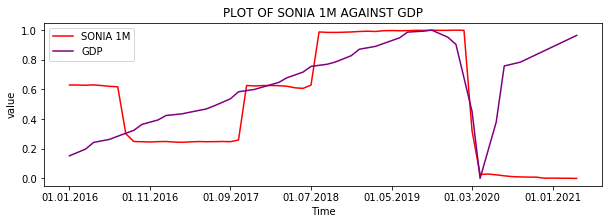

In [148]:
df_min_max_scaled = df.copy()
#df1_min_max_scaled=df1.copy()
# apply normalization techniques by Column 1
columns=df_min_max_scaled.columns
#columns1=df1_min_max_scaled.columns
for col in columns:
    df_min_max_scaled[col] = (df_min_max_scaled[col] - df_min_max_scaled[col].min()) / (df_min_max_scaled[col].max() - df_min_max_scaled[col].min())    
# for col in columns1:
#     df1_min_max_scaled[col] = (df1_min_max_scaled[col] - df1_min_max_scaled[col].min()) / (df1_min_max_scaled[col].max() - df1_min_max_scaled[col].min())    

plt.rcParams["figure.figsize"] = (10,3)
df_min_max_scaled["SONIA 1M"].plot(color="red",legend=True)
df_min_max_scaled["GDP"].plot(color="purple",legend=True)
#df_min_max_scaled["Interest Rates"].plot(color="cyan",legend=True)
#plt.xticks([1-1-2016,1-1-2021])
plt.xlabel("Time")
plt.ylabel("value")
plt.title("PLOT OF SONIA 1M AGAINST GDP")
    
    
    
    
# cols=list(df.columns)[1:]
# cols1=list(df1.columns[1:])
# view normalized data
#display(df1_min_max_scaled)
# plt.rcParams["figure.figsize"] = (20,10)
# fig, ax = plt.subplots(4,2)
# plt.suptitle("PLOT OF DIFFERENT MACRO VARIABLES WITH LIBOR MONTHLY AVERAGE DATA", fontsize=14)
# fig.delaxes(ax[3,1])
# c=0
# for i in range(4):
#     for j in range(2):
#         if c<=len(cols)-1:
#             ax[i,j].plot(df_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df_min_max_scaled[cols[c]])
#             ax[i,j].legend(["LIBOR 1M",cols[c]])
#             ax[i,j].set_xticks(["01-03-2016","01-03-2017","01-03-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")
#             c=c+1
#         else:
#             ax[i,j].plot(df1_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df1_min_max_scaled[cols1])
#             ax[i,j].legend(["LIBOR 1M",cols1])
#             ax[i,j].set_xticks(["01-04-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Inflation"], df["SONIA 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Short term interest rates"], df["SONIA 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Long term interest rates"], df["SONIA 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["GDP"], df["SONIA 1M"])
print('Pearsons correlation: %.3f' % corr)

In [37]:
df["Inflation_lag1"]=df["Inflation"].shift(-1)
#df["Inflation_lag2"]=df["Inflation"].shift(-2)
#df["Inflation_lag3"]=df["Inflation"].shift(-3)
df.dropna(inplace=True)
df.tail()

,SONIA 1M,Inflation,Short term interest rates,Long term interest rates,GDP,Inflation_lag1
Date,,,,,,
01.11.2020,0.053552,0.3,0.04,0.3836,545882.0,0.6
01.12.2020,0.048695,0.6,0.03,0.3224,548001.0,0.7
01.01.2021,0.049370,0.7,0.03,0.3672,550120.0,0.4
01.02.2021,0.048695,0.4,0.05,0.6222,552239.0,0.7
01.03.2021,0.048613,0.7,0.08,0.8456,554358.0,0.7


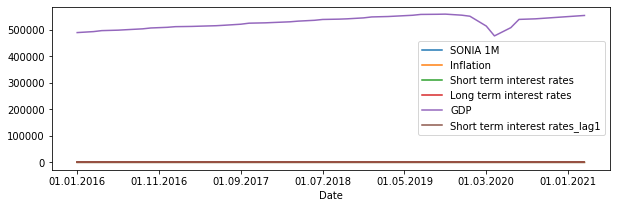

In [91]:
df["Short term interest rates_lag1"]=df["Short term interest rates"].shift(-1)
#df["Short term interest rates_lag2"]=df["Short term interest rates"].shift(-2)
#df["Short term interest rates_lag3"]=df["Short term interest rates"].shift(-3)
df.dropna(inplace=True)
df.tail()

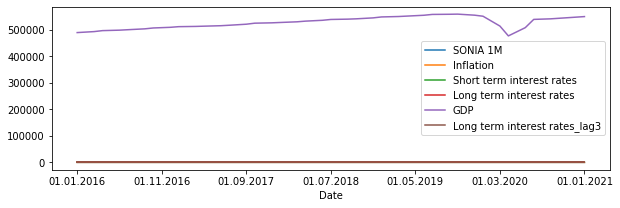

In [133]:
#df["Long term interest rates_lag1"]=df["Long term interest rates"].shift(-1)
#df["Long term interest rates_lag2"]=df["Long term interest rates"].shift(-2)
df["Long term interest rates_lag3"]=df["Long term interest rates"].shift(-3)
df.dropna(inplace=True)
df.tail()

In [178]:
#df["GDP_lag1"]=df["GDP"].shift(-1)
#df["GDP_lag2"]=df["GDP"].shift(-2)
df["GDP_lag3"]=df["GDP"].shift(-3)
df.dropna(inplace=True)
df.tail()

,SONIA 1M,Inflation,Short term interest rates,Long term interest rates,GDP,GDP_lag3
Date,,,,,,
01.09.2020,0.054636,0.5,0.06,0.2730,541644.0,548001.0
01.10.2020,0.053823,0.7,0.05,0.3058,543763.0,550120.0
01.11.2020,0.053552,0.3,0.04,0.3836,545882.0,552239.0
01.12.2020,0.048695,0.6,0.03,0.3224,548001.0,554358.0
01.01.2021,0.049370,0.7,0.03,0.3672,550120.0,556477.0


In [179]:
# df=df[["Libor 1M","Inflation"]]
df=df[["SONIA 1M","GDP_lag3"]]
df.tail()

,SONIA 1M,GDP_lag3
Date,,
01.09.2020,0.054636,548001.0
01.10.2020,0.053823,550120.0
01.11.2020,0.053552,552239.0
01.12.2020,0.048695,554358.0
01.01.2021,0.049370,556477.0


In [180]:
#GRANGER'S CAUSALITY TEST TO DETERMINE THE PRESENCE OF RELATIONSHIPS BETWEEN TIME SERIES.
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            print(p_values)
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.1434, 0.2719, 0.0796, 0.4534, 0.6623, 0.5742, 0.8567, 0.8817, 0.9396, 0.9606]
[0.0091, 0.0002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


,SONIA 1M_x,GDP_lag3_x
SONIA 1M_y,1.0000,0.0
GDP_lag3_y,0.0796,1.0


In [167]:
#TRAIN-TEST SPLIT

nobs = int(0.1*len(df))
print(nobs)
df_train, df_test = df.iloc[:-nobs,:], df.iloc[-nobs:,:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

6
(56, 2)
(6, 2)


In [168]:
#AUGMENTED DICKEY-FULLER TEST FOR STATIONARITY

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
          
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SONIA 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4347
 No. Lags Chosen       = 1
 Critical value 1%     = -3.558
 Critical value 5%     = -2.917
 Critical value 10%    = -2.596
 => P-Value = 0.5655. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP_lag2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8513
 No. Lags Chosen       = 6
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.3553. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [169]:
# 1st difference
df_differenced = df_train.diff().dropna()
df_diff=pd.DataFrame()
columns=df_train.columns
for col in columns:
    
    df_diff[str(col)+"difference1"]=df_train[str(col)].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SONIA 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.6267
 No. Lags Chosen       = 0
 Critical value 1%     = -3.558
 Critical value 5%     = -2.917
 Critical value 10%    = -2.596
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP_lag2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4693
 No. Lags Chosen       = 5
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0088. Rejecting Null Hypothesis.
 => Series is Stationary.




In [14]:
# 2nd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference2"]=df_diff[str(col)+"difference1"].diff()
# df_diff["difference2"]=df_diff["difference1"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7423
 No. Lags Chosen       = 5
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0036. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4489
 No. Lags Chosen       = 11
 Critical value 1%     = -3.597
 Critical value 5%     = -2.933
 Critical value 10%    = -2.605
 => P-Value = 0.1284. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [15]:
# 3rd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference3"]=df_diff[str(col)+"difference2"].diff()
#df_diff["difference3"]=df_diff["difference2"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5899
 No. Lags Chosen       = 4
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7822
 No. Lags Chosen       = 10
 Critical value 1%     = -3.597
 Critical value 5%     = -2.933
 Critical value 10%    = -2.605
 => P-Value = 0.0609. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [16]:
# 4th difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference4"]=df_diff[str(col)+"difference3"].diff()
#df_diff["difference3"]=df_diff["difference2"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3777
 No. Lags Chosen       = 7
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1727
 No. Lags Chosen       = 9
 Critical value 1%     = -3.597
 Critical value 5%     = -2.933
 Critical value 10%    = -2.605
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [170]:
#FIT THE VAR MODEL

model = VAR(df_differenced)

/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [171]:
#TRAINING THE MODEL

model_fitted = model.fit(2)  #place the lag value as parameter
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, May, 2021
Time:                     17:09:01
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.0899
Nobs:                     53.0000    HQIC:                   12.8612
Log likelihood:          -477.440    FPE:                    334142.
AIC:                      12.7182    Det(Omega_mle):         279015.
--------------------------------------------------------------------
Results for equation SONIA 1M
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.010398         0.010766           -0.966           0.334
L1.SONIA 1M         0.233008         0.154015            1.513           0.130
L1.GDP_lag2         0.000004         0.000002            2.526   

In [172]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
print(df_differenced)
forecast_input = df_differenced.values[-lag_order:]
forecast_input

2
            SONIA 1M  GDP_lag2
Date                          
01.02.2016 -0.000203   3702.50
01.03.2016 -0.001038    859.50
01.04.2016  0.001714    859.50
01.05.2016 -0.003024   1719.00
01.06.2016 -0.003546   1635.25
01.07.2016 -0.002059   1635.25
01.08.2016 -0.209927   3270.50
01.09.2016 -0.034745   1232.75
01.10.2016 -0.000999   1232.75
01.11.2016 -0.001183   2465.50
01.12.2016  0.001575    467.00
01.01.2017  0.000675    467.00
01.02.2017 -0.002460    934.00
01.03.2017 -0.001148    882.25
01.04.2017  0.001841    882.25
01.05.2017  0.001525   1764.50
01.06.2017 -0.000807   1938.75
01.07.2017  0.000335   1938.75
01.08.2017  0.000715   3877.50
01.09.2017 -0.000957    658.00
01.10.2017  0.007916    658.00
01.11.2017  0.243436   1316.00
01.12.2017 -0.001912   1274.25
02.01.2018  0.001562   1274.25
01.02.2018  0.000434   2548.50
01.03.2018 -0.000885   1580.25
01.04.2018 -0.002219   1580.25
01.05.2018 -0.007240   3160.50
01.06.2018 -0.002541    595.75
01.07.2018  0.014500    595.75
01.08.

array([[-4.47845850e-03,  1.05950000e+03],
       [-3.58322981e-03,  2.11900000e+03]])

In [173]:
# Forecast
od=1  #order of difference to make it stationary
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_'+str(od)+'d')
df_forecast

,SONIA 1M_1d,GDP_lag2_1d
Date,,
01.09.2020,-0.000988,973.896010
01.10.2020,-0.002358,788.396575
01.11.2020,-0.005733,604.310553
01.12.2020,-0.007822,658.046822
01.01.2021,-0.008901,763.331385
01.02.2021,-0.008852,856.933252


In [174]:
#INVERT TRANSFORMATION TO GET REAL FORECAST
def invert(ori,diff_data):
    last_val=ori[-1]
    data=[]
    for idx,i in enumerate(diff_data):
        #print(idx,i+last_val)
        last_val+=i
        data.append(last_val)
    #print(len(data))
    return data

def invert_transformation(df_train, df_forecast,df_diff, difference):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        if difference==4:
            df_fc[str(col)+"_3d"]=invert(list(df_diff[str(col)+"difference3"].values),list(df_fc[str(col)+"_4d"].values))
            df_fc[str(col)+"_2d"]=invert(list(df_diff[str(col)+"difference2"].values),list(df_fc[str(col)+"_3d"].values))
            df_fc[str(col)+"_1d"]=invert(list(df_diff[str(col)+"difference1"].values),list(df_fc[str(col)+"_2d"].values))
            df_fc[str(col)+" forecast"]=invert(list(df_train[str(col)].values),list(df_fc[str(col)+"_1d"].values)) 
        if difference==3:
            df_fc[str(col)+"_2d"]=invert(list(df_diff[str(col)+"difference2"].values),list(df_fc[str(col)+"_3d"].values))
            df_fc[str(col)+"_1d"]=invert(list(df_diff[str(col)+"difference1"].values),list(df_fc[str(col)+"_2d"].values))
            df_fc[str(col)+" forecast"]=invert(list(df_train[str(col)].values),list(df_fc[str(col)+"_1d"].values)) 
        # Roll back 2nd Diff
        if difference==2:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
            # Roll back 1st Diff
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==1:
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==0:
            df_fc[str(col)+' forecast']=df_fc[str(col)+'_0d']
    return df_fc



df_results_all = invert_transformation(df_train, df_forecast,df_diff, od)
df_results=copy.deepcopy(df_results_all)
columns=df_results_all.columns
for col in columns:
    if len(col.split())==1:
        df_results.drop(col,axis=1,inplace=True)
print(df_results)
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

            SONIA 1M_1d  SONIA 1M forecast  GDP_lag2 forecast
Date                                                         
01.09.2020    -0.000988           0.054955      544736.896010
01.10.2020    -0.002358           0.052596      545525.292585
01.11.2020    -0.005733           0.046864      546129.603138
01.12.2020    -0.007822           0.039042      546787.649960
01.01.2021    -0.008901           0.030141      547550.981345
01.02.2021    -0.008852           0.021289      548407.914598


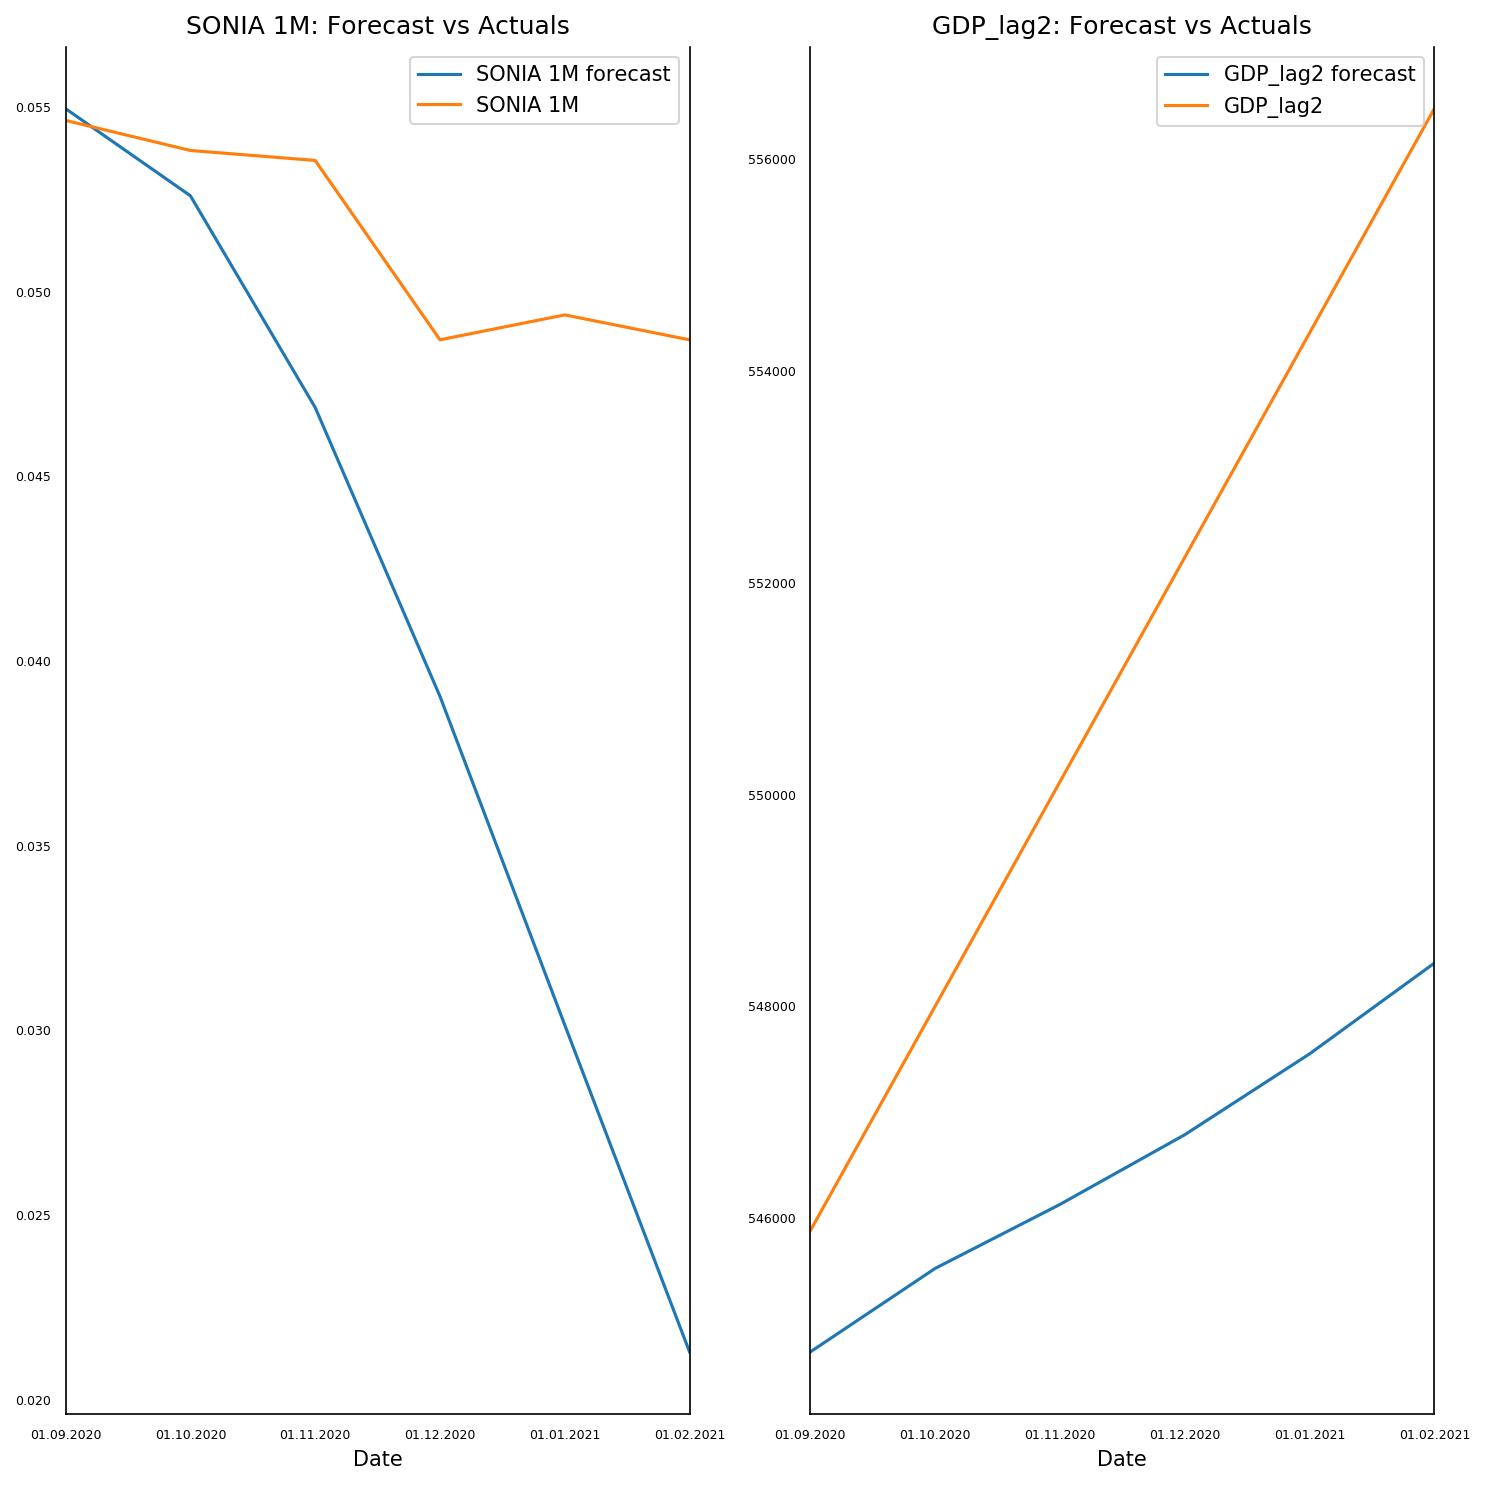

In [175]:
#PLOT OF ACTUAL VS FORECAST

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+' forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [176]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'rmse':rmse})
columns=df_train.columns
for col in columns:
    print('Forecast Accuracy of: '+str(col))
    accuracy_prod = forecast_accuracy(df_results[str(col)+' forecast'].values, df_test[str(col)])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: SONIA 1M
rmse :  0.0145
Forecast Accuracy of: GDP_lag2
rmse :  5236.5147
